## Label Propogation for Community Detection

Consider a undirected & not weighted simple graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

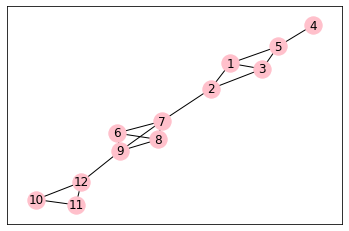

In [2]:
G = nx.Graph()
G.add_edges_from([[1,2], [2,3], [1,3], [4,5], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12],
                  [9,12], [2,7]])
nx.draw_networkx(G, with_labels=True, node_color='pink')

In [3]:
# Compute the number of nodes in the graph
edges = [[1,2], [2,3], [1,3], [4,5], [1,5], [3,5],
         [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
         [10,11], [11,12], [10,12], [9,12], [2,7]]
n_nodes = max(max(edge) for edge in edges)

# Create an empty adjacency matrix
A_m = sparse.csr_matrix((n_nodes, n_nodes), dtype=np.int8)

# Fill in the adjacency matrix
for edge in edges:
    i, j = edge
    A_m[i-1, j-1] = 1
    A_m[j-1, i-1] = 1

# Print the adjacency matrix
A = A_m.toarray()
A

/Users/liuxiwen/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]], dtype=int8)

In [4]:
# Define the transition matrix T
D = sparse.diags(np.ravel(np.sum(A, axis=1)))
T = sparse.linalg.inv(D) * A
T

/Users/liuxiwen/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/Users/liuxiwen/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


array([[0.        , 0.33333333, 0.33333333, 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        ,

In [10]:
import sys

def LabelPropagation(T, Y, diff, max_iter, labelled):
    
    # Initialize
    Y_init = Y
    Y1 = Y
    
    # Initialize convergence parameters
    n = 0
    current_diff = sys.maxsize
    
    # Iterate till difference reduces below diff or till the maximum number of iterations is reached
    while current_diff > diff and n < max_iter:
        
        current_diff = 0.0
        # Set Y(t)
        Y0 = Y1
        
        # Calculate Y(t+1)
        Y1 = T.dot(Y0)
        
        # Clamp labelled data
        for i in range(Y_init.shape[0]):
            if i in labelled:
                Y1.A[i] = Y_init.A[i]
        
        # Get difference between values of Y(t+1) and Y(t)
        for i in range(Y1.shape[0]):
            for j in range(Y1.shape[1]):
                current_diff += abs(Y1.A[i][j] - Y0.A[i][j])
        
        n += 1
        
    return Y1

In [19]:
# Run the LabelPropagation algorithm
Y=np.matrix(A)
Y

matrix([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]], dtype=int8)

In [30]:
original_colors = {3: 0, 5: 1, 10:2}
labelled = list(original_colors.keys())

In [31]:
Y_1 = LabelPropagation(T, Y, diff=0.01, max_iter=100, labelled=labelled)
Y_1
Y_1.argmax(1)

matrix([[ 4],
        [ 6],
        [ 4],
        [ 4],
        [ 4],
        [ 6],
        [ 6],
        [ 6],
        [ 6],
        [11],
        [ 9],
        [11]])

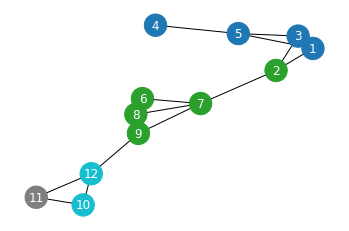

In [32]:
# Define the label matrix
label_matrix = np.array(Y_1.argmax(1))

# Color the nodes based on the label matrix
node_colors = [label_matrix[i][0] for i in range(len(label_matrix))]


# Compute node positions using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.tab10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_color='white')
plt.axis('off')
plt.show()